In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import plotly.graph_objects as go


In [2]:
df_competencia = pd.read_pickle("../data/limpieza/hoteles_competencia_completo.pkl")
df_propios = pd.read_pickle("../data/limpieza/hoteles_propios.pkl")
df_final = pd.read_pickle("../data/final/hoteles_final.pkl")

# INSIGHTS

1. PRECIOS
2. VALORACION
3. VALORACIONS VS PRECIO
4. GENERAL
5. FECHAS
5. TOP 10

### 1. PRECIOS

In [3]:
# Boxplot con Plotly 
fig = px.box(df_final, 
             x="competencia", 
             y="precio_noche",
             color = "competencia",
             title="Comparación de Precios: Hoteles Propios vs Competencia",
             points="all", # Mostrar todos los puntos atípicos
             color_discrete_map={True: "burlywood", False: "cadetblue"} )  

fig.update_layout(xaxis_title="Tipo de Hotel", 
                  yaxis_title="Precio por Noche",
                  legend_title="Competencia")

fig.show()


- Competencia:  
    Sus precios son muchos más bajos y concentrados: en apenas 45€ se concentran el 50% de los reservas (110€-154€) con un outlier que ronda los 250€ (aprocimadamente donde se encuentran la mayoría de nuestros hoteles).  

- Propios  

    Nuestros precios abarcan desde hoteles low cost de 50€ hasta hoteles de lujo de aprox 500€.  
    La dispersión es mayor: el 50% de las reservas para nustros hoteles están en un rango +200€ (164€-387€).


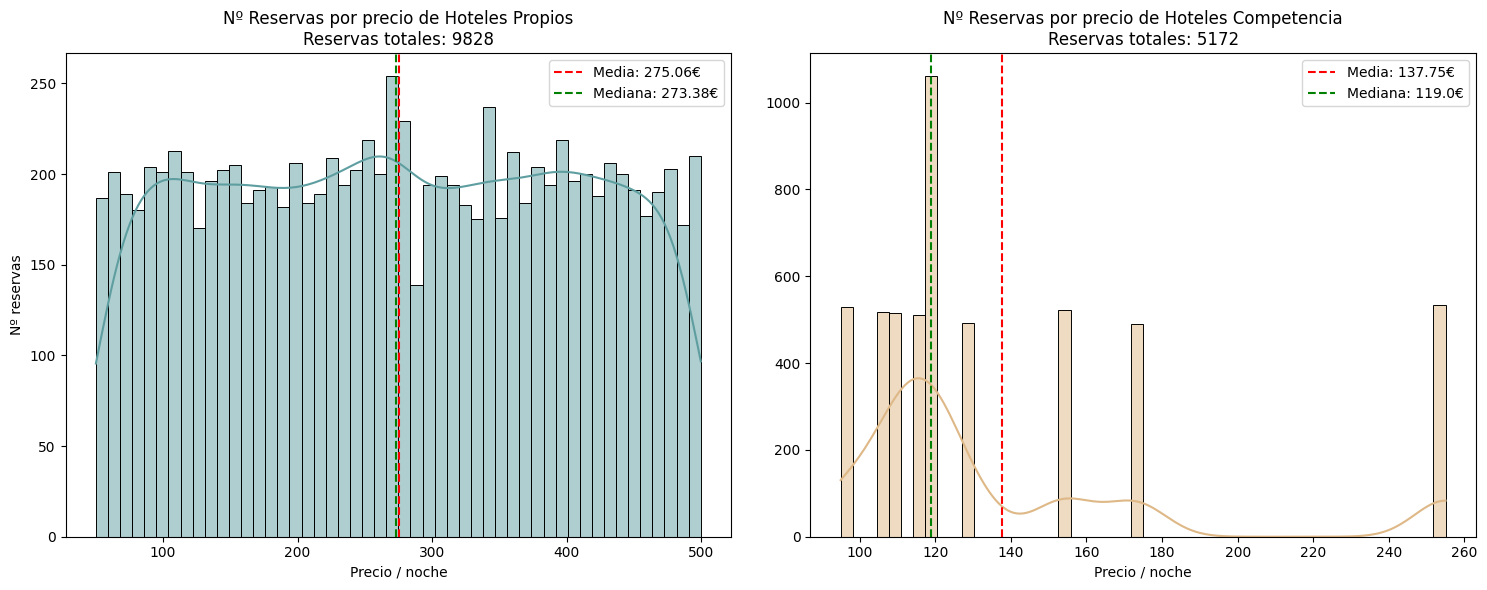

In [4]:
media_propios = np.mean(df_propios["precio_noche"])
mediana_propios = np.median(df_propios["precio_noche"])
reservas_totales_propios = df_propios.shape[0]

media_competencia = np.mean(df_competencia["precio_noche"])
mediana_competencia = np.median(df_competencia["precio_noche"])
reservas_totales_competencia = df_competencia.shape[0]


fig, axes = plt.subplots(1, 2, figsize=(15, 6))


sns.histplot(df_propios["precio_noche"], bins=50, kde=True, ax=axes[0], color="cadetblue")
axes[0].set_title(f"Nº Reservas por precio de Hoteles Propios\nReservas totales: {reservas_totales_propios}")
axes[0].set_xlabel("Precio / noche")
axes[0].set_ylabel("Nº reservas")
axes[0].axvline(media_propios, color="red", linestyle="dashed", label=f"Media: {round(media_propios, 2)}€")
axes[0].axvline(mediana_propios, color="green", linestyle="dashed", label=f"Mediana: {round(mediana_propios, 2)}€")
axes[0].legend()


sns.histplot(df_competencia["precio_noche"], bins=50, kde=True, ax=axes[1], color="burlywood")
axes[1].set_title(f"Nº Reservas por precio de Hoteles Competencia\nReservas totales: {reservas_totales_competencia}")
axes[1].set_xlabel("Precio / noche")
axes[1].set_ylabel(" ")
axes[1].axvline(media_competencia, color="red", linestyle="dashed", label=f"Media: {round(media_competencia, 2)}€")
axes[1].axvline(mediana_competencia, color="green", linestyle="dashed", label=f"Mediana: {round(mediana_competencia, 2)}€")
axes[1].legend()


plt.tight_layout()
plt.show()



Los hoteles propios de media tienen precios por noche práctimente el doble de altos que los de la comeptencia. Pero a pesar de tener precios más elevados, los hoteles propios han recibido casi el doble de reservas (+90%) que los de la competencia.

Las reservas en nuestros hoteles están mucho más distribuidas que en los de la competencia, donde más de 1000 de sus reservas (aprox 20%) se concentran en hoteles con un precio de 120€/noche. En nuestro caso, la mayor concentración de reservas resulta en un 2.5% del total a un precio de 275€/noche.

**CONCLUSIÓN**  
Los hoteles propios tienen precios más elevados pero aún así consiguen más reservas. Esto sugiere que:
- A: El valor percibido de estos hoteles justifica el precio más alto, lo que intentaremos corroborar más adelante.
- B: Si las valoraciones de nuestros clientes a nuetros hoteles son más bajas que los de la competencia, podría indicar que nuestro público objetivo es diferente: quizá con un poder adquisitivo mayor que no le importa pagar de más, por ejemplo por reservar con menos antelación debido a que viajan por negocio en vez de por ocio.

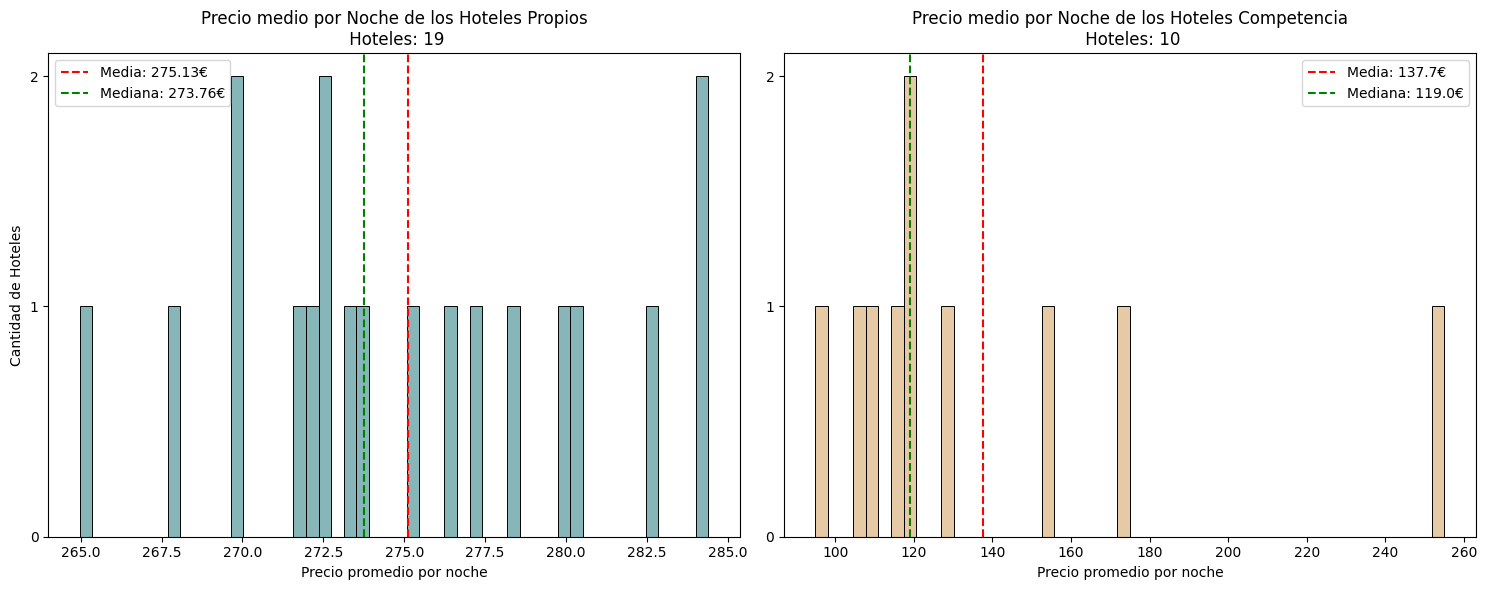

In [5]:
df_media_precio_hoteles_propios = df_propios.groupby("nombre_hotel")["precio_noche"].mean().reset_index()
total_hoteles_propios = df_media_precio_hoteles_propios.shape[0]
media_precio_propios = df_media_precio_hoteles_propios["precio_noche"].mean()
mediana_precio_propios = df_media_precio_hoteles_propios["precio_noche"].median()

df_media_precio_hoteles_competencia = df_competencia.groupby("nombre_hotel")["precio_noche"].mean().reset_index()
total_hoteles_competencia = df_media_precio_hoteles_competencia.shape[0]
media_precio_competencia = df_media_precio_hoteles_competencia["precio_noche"].mean()
mediana_precio_competencia = df_media_precio_hoteles_competencia["precio_noche"].median()


fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(df_media_precio_hoteles_propios["precio_noche"], bins=50, ax=axes[0], color="cadetblue")
axes[0].set_title(f"Precio medio por Noche de los Hoteles Propios\n Hoteles: {total_hoteles_propios}")
axes[0].set_xlabel("Precio promedio por noche")
axes[0].set_ylabel("Cantidad de Hoteles")
axes[0].axvline(media_precio_propios, color="red", linestyle="dashed", label=(f"Media: {round(media_precio_propios, 2)}€"))
axes[0].axvline(mediana_precio_propios, color="green", linestyle="dashed", label=(f"Mediana: {round(mediana_precio_propios, 2)}€"))
axes[0].set_yticks(np.arange(0, 3, 1))
axes[0].legend()

sns.histplot(df_media_precio_hoteles_competencia["precio_noche"], bins=50, ax=axes[1], color="burlywood")
axes[1].set_title(f"Precio medio por Noche de los Hoteles Competencia\n Hoteles: {total_hoteles_competencia}")
axes[1].set_xlabel("Precio promedio por noche")
axes[1].set_ylabel("")
axes[1].axvline(media_precio_competencia, color="red", linestyle="dashed", label=(f"Media: {round(media_precio_competencia, 2)}€"))
axes[1].axvline(mediana_precio_competencia, color="green", linestyle="dashed", label=(f"Mediana: {round(mediana_precio_competencia, 2)}€"))
axes[1].set_yticks(np.arange(0, 3, 1))
axes[1].legend()

plt.tight_layout()
plt.show()


El precio prmedio el hotel más caro de la competencia no llega al precio prmedio del hotel propio más barato.   
La diferencia de precios en los hoteles propios en escasa: 20€ desde el hotel con la media por noche más baja al hotel con la media por noche más alta.  
De hecho, casi el 60% de nuestros hoteles estan en un precio noche promedio de 10€ de diferencia (270€-280€).

### 2. VALORACION

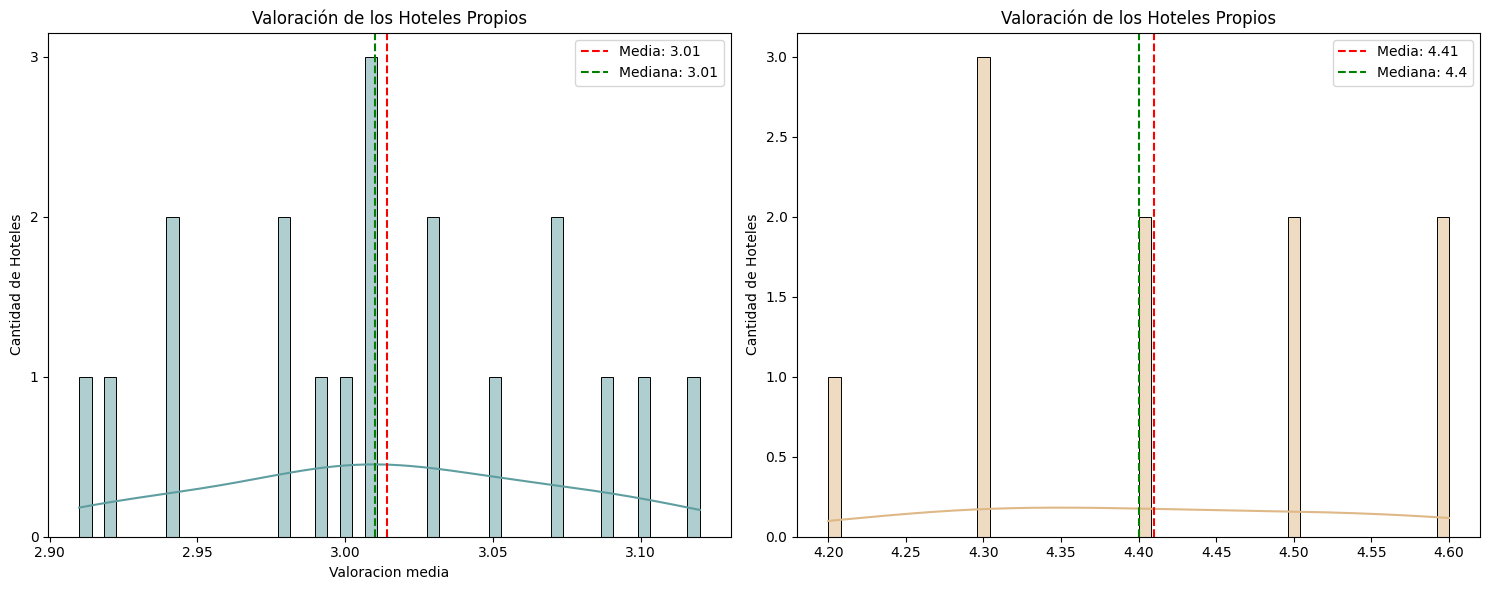

In [6]:
df_media_val_hoteles_propios = df_propios.groupby("nombre_hotel")["valoracion"].mean().reset_index()
df_media_val_hoteles_competencia = df_competencia.groupby("nombre_hotel")["valoracion"].mean().reset_index()

media_valoracion_propios = np.mean(df_propios["valoracion"])
mediana_valoracion_propios = np.median(df_propios["valoracion"])


media_valoracion_competencia = np.mean(df_competencia["valoracion"])
mediana_valoracion_competencia = np.median(df_competencia["valoracion"])

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(df_media_val_hoteles_propios["valoracion"], bins=50, kde=True, ax=axes[0], color="cadetblue")
axes[0].set_title("Valoración de los Hoteles Propios")
axes[0].set_xlabel("Valoracion media")
axes[0].set_ylabel("Cantidad de Hoteles")
axes[0].axvline(media_valoracion_propios, color="red", linestyle="dashed", label=(f"Media: {round(media_valoracion_propios, 2)}"))
axes[0].axvline(mediana_valoracion_propios, color="green", linestyle="dashed", label=(f"Mediana: {round(mediana_valoracion_propios, 2)}"))
axes[0].set_yticks(np.arange(0, 4, 1))
axes[0].legend()

sns.histplot(df_media_val_hoteles_competencia["valoracion"], bins=50, kde=True, ax=axes[1], color="burlywood")
axes[1].set_title("Valoración de los Hoteles Propios")
axes[1].set_xlabel(" ")
axes[1].set_ylabel("Cantidad de Hoteles")
axes[1].axvline(media_valoracion_competencia, color="red", linestyle="dashed", label=(f"Media: {round(media_valoracion_competencia, 2)}"))
axes[1].axvline(mediana_valoracion_competencia, color="green", linestyle="dashed", label=(f"Mediana: {round(mediana_valoracion_competencia, 2)}"))
axes[0].set_yticks(np.arange(0, 4, 1))
axes[1].legend()

plt.tight_layout()
plt.show()


- Nuestros hoteles tienen menos valoración de media que los de la competencia.  
- Al contrario que con los precios medios por noche, la valoración media de nuestro mejor hotel es 1 punto menor que la valoracion media del peor hotel de la competencia.  
- Esto es preocupante porque nuestros precios son el doble de altos pero sin embargo nuestros clientes no están igual de satisfetos que los clientes de la competencia con precios la mitad de caros.
- Si los nuestros hoteles siguen manteniendo precios altos con menor valoración que la competencia podrían perder clientes.


### 3. VALORACION-PRECIO Propios VS Competencia

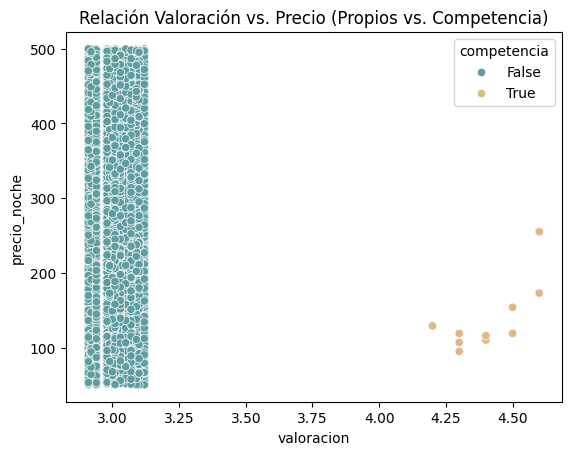

In [7]:
colores = {True: "burlywood", False: "cadetblue"}  # True = Hoeteles Competencia -- False = Hoteles propios


sns.scatterplot(data=df_final, x="valoracion", y="precio_noche", hue="competencia", palette=colores)
plt.title("Relación Valoración vs. Precio (Propios vs. Competencia)")
plt.show()


Podemos observar que en los propios hay hoteles de 50€ y de 500€ que tienen la misma valoración.   
No hay una correlación fuerte entre el precio por noche y la valoración de los clientes.  
Esto deberíamos revisarlo y ver por qué los clientes no tienen una percepción asociada al nivel de precios. 

### 4. HOTELES GENERAL

**PODRÍAMOS EXTRAER CONCLUSIONES DEL SECTOR HOTELERO SI ACEPTÁRAMOS QUE TODOS LOS HOTELES DE DF_FINAL FEURAN TODOS LOS HOTELES DEL SECTOR**

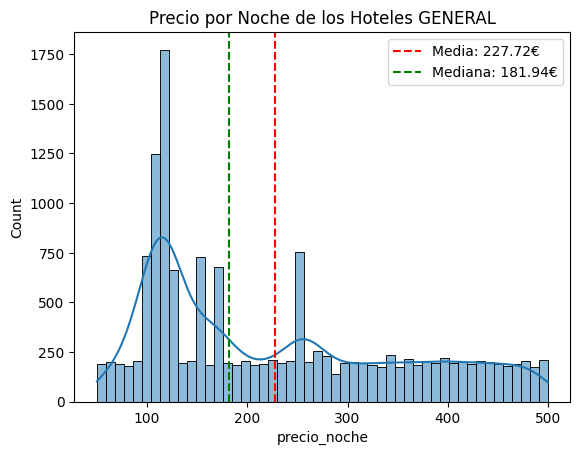

In [8]:
media = np.mean(df_final["precio_noche"])
mediana = np.median(df_final["precio_noche"])

sns.histplot(df_final["precio_noche"], bins=50, kde=True)
plt.title("Precio por Noche de los Hoteles GENERAL")
plt.axvline(media, color="red", linestyle="dashed", label=(f"Media: {round(media, 2)}€"))
plt.axvline(mediana, color="green", linestyle="dashed", label=(f"Mediana: {round(mediana, 2)}€"))
plt.legend()
plt.show()

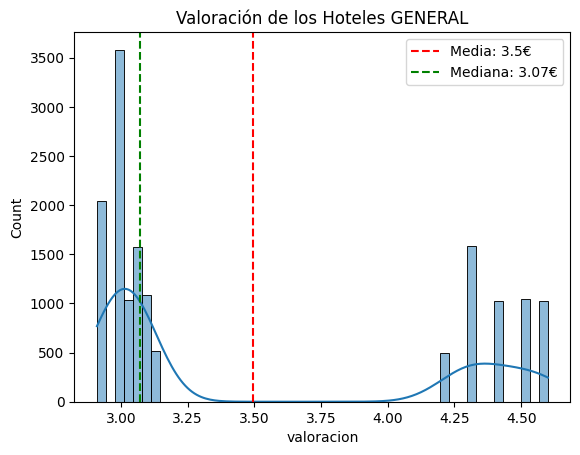

In [9]:
media = np.mean(df_final["valoracion"])
mediana = np.median(df_final["valoracion"])

sns.histplot(df_final["valoracion"], bins=50, kde=True)
plt.title("Valoración de los Hoteles GENERAL")
plt.axvline(media, color="red", linestyle="dashed", label=(f"Media: {round(media, 2)}€"))
plt.axvline(mediana, color="green", linestyle="dashed", label=(f"Mediana: {round(mediana, 2)}€"))
plt.legend()
plt.show()

### 5. RESERVAS

In [10]:

reservas_por_dia = df_final.groupby("fecha_reserva",)["id_reserva"].count().reset_index()
fig = px.line(reservas_por_dia, 
              x="fecha_reserva", 
              y="id_reserva", 
              title="Evolución de Reservas en el Tiempo",
              labels={"fecha_reserva": "Fecha de Reserva", "id_reserva": "Número de Reservas"})

fig.show()

In [11]:
fig = px.histogram(df_final, 
                   x="fecha_reserva", 
                   color="competencia",  # Equivalente a hue en Seaborn
                   nbins=30, 
                   title="Distribución de Reservas por Fecha según Competencia",
                   color_discrete_map={True: "burlywood", False: "cadetblue"} )

fig.update_layout(xaxis_title="Fecha de Reserva", 
                  yaxis_title="Nº Reservas",
                  legend_title="Competencia")

fig.show()


C:\Users\victo\AppData\Local\Temp\ipykernel_5040\940950783.py:28: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\victo\AppData\Local\Temp\ipykernel_5040\940950783.py:29: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



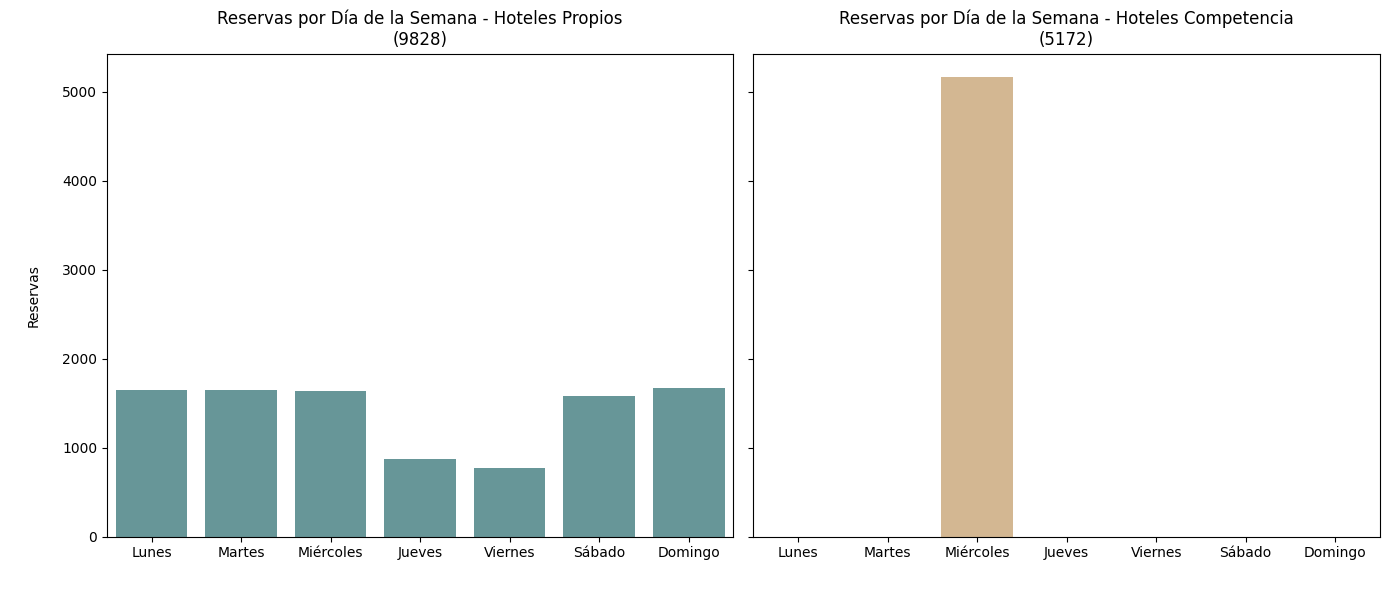

In [12]:
# Extraer el día de la semana en que se hizo la reserva
df_propios["dia_semana"] = df_propios["fecha_reserva"].dt.day_name()
df_competencia["dia_semana"] = df_competencia["fecha_reserva"].dt.day_name()

# Relación Inglés-Español de los días de la semana
dicc_dias = {"Monday":"Lunes", "Tuesday": "Martes", "Wednesday": "Miércoles", "Thursday":"Jueves", "Friday": "Viernes", "Saturday": "Sábado", "Sunday":"Domingo"}

# Reemplazar los valores de la columna dia_semana en ingles por su traducción en español
df_propios["dia_semana"] = df_propios["dia_semana"].replace(dicc_dias)
df_competencia["dia_semana"] = df_competencia["dia_semana"].replace(dicc_dias)

# Definir el orden de los días de la semana 
dias_ordenados = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]


# Convertir la columna "dia_semana" en un tipo categórico 

# Un tipo de dato categórico es un tipo de dato especial para columnas que contienen un número limitado de valores únicos
# Por ejemplo: colores, días de la semana, niveles de satisfacción, etc.
# Tipo object vs tipo Categorical
# 1. Menor uso de memoria (almacenan una referencia a la categoría en lugar de repetir el texto en cada fila) 
# 2. Ordenación personalizada (se puede definir el orden exacto en lugar de seguir un orden alfabético).
# 3. Mayor eficiencia en operaciones de comparacion y agrupacion (+ rápido)

df_propios["dia_semana"] = pd.Categorical(df_propios["dia_semana"], categories=dias_ordenados, ordered=True)
df_competencia["dia_semana"] = pd.Categorical(df_competencia["dia_semana"], categories=dias_ordenados, ordered=True)

reservas_propios = df_propios.groupby("dia_semana")["id_reserva"].count().reindex(dias_ordenados)
reservas_competencia = df_competencia.groupby("dia_semana")["id_reserva"].count().reindex(dias_ordenados)

# GRÁFICO
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True) # sharey=True es para poder compara los dos gráfivos (que ambos tengan la misma escala en el eje Y)

sns.barplot(x=reservas_propios.index, y=reservas_propios.values, ax=axes[0], color="cadetblue")
axes[0].set_title(f"Reservas por Día de la Semana - Hoteles Propios\n({df_propios.shape[0]})")
axes[0].set_xlabel(" ")
axes[0].set_ylabel("\nReservas\n")

sns.barplot(x=reservas_competencia.index, y=reservas_competencia.values, ax=axes[1], color="burlywood")
axes[1].set_title(f"Reservas por Día de la Semana - Hoteles Competencia\n({df_competencia.shape[0]})")
axes[1].set_xlabel(" ")

plt.tight_layout() # Sin tight_layout() los días de la semana se ven muy pegados uno a otros

plt.show()


### 6. TOP 10

Creamos una nueva columna que calcula el ingreso total según el precio por noche y la duración de estancia:

In [13]:
df_final["ingreso_reserva"] = df_final["precio_noche"] * (df_final["final_estancia"] - df_final["inicio_estancia"]).dt.days

Creamos un dataframe con los nombres de los hoteles, si son competencia o no y la suma de la recaudación total:

In [14]:
ingresos_hoteles = df_final.groupby(["nombre_hotel", "competencia", "valoracion"])["ingreso_reserva"].sum().round(2).reset_index()

TOP 10 HOTELES MAYOR RECAUDACIÓN

In [15]:
df_top10_hoteles = ingresos_hoteles.sort_values(by="ingreso_reserva", ascending=False).head(10)
df_top10_hoteles

,nombre_hotel,competencia,valoracion,ingreso_reserva
11,Hotel Monte Verde,False,3.10,152136.81
15,Hotel Sol y Luna,False,3.01,149237.77
13,Hotel Puerta del Cielo,False,3.03,147359.55
1,Hotel Brisas del Mar,False,3.09,146970.64
3,Hotel Costa Azul,False,3.12,146405.73
7,Hotel Los Almendros,False,3.01,145915.67
10,Hotel Mirador Real,False,2.98,145661.05
8,Hotel Luz de Madrid,False,3.05,144685.49
21,Palacio del Sol,False,2.99,144071.00
17,Hotel Vista Alegre,False,2.94,142978.89


Los 10 hoteles que más han recaudado son hoteles propios

In [16]:
df_top10_hoteles = df_top10_hoteles.sort_values(by="ingreso_reserva", ascending=True) # Por lo visto Plotly visualiza los valores "al reves" del orden en el que están.
# Pone en la primera línea horizontal el primer valor del df (en este caso el de mayor recaudación) y Los va apilando hacia arriba.  
# Por lo que tendremos que "girar" el orden del df para que al ordenarlos plotly ponga primero abajo el de menor valor y arriba el primero el de mayr valor.

fig = px.bar(df_top10_hoteles, 
             x="ingreso_reserva", 
             y="nombre_hotel", 
             orientation='h',  
             color = "competencia",
             title="Top 10 Hoteles por Ingresos",
             labels={"ingreso_reserva": "Ingresos (€)", "nombre_hotel": "Hotel", "competencia": "Tipo de Hotel"},
             color_discrete_map={True: "burlywood", False: "cadetblue"} 
            )

fig.show()


LOS 10 PEORES HOTELES EN RECAUDACIÓN:

In [17]:
df_low10_hoteles = ingresos_hoteles.sort_values(by="ingreso_reserva", ascending=False).tail(10)
df_low10_hoteles

,nombre_hotel,competencia,valoracion,ingreso_reserva
12,Hotel Palacio Imperial,False,3.01,126047.82
20,Novotel Madrid City Las Ventas,True,4.60,84597.00
18,Novotel Madrid Campo de las Naciones,True,4.50,80388.00
27,ibis budget Madrid Centro las Ventas,True,4.30,63903.00
22,Pullman Madrid Airport & Feria,True,4.20,63597.00
24,ibis Madrid Calle Alcalá,True,4.50,62356.00
23,ibis Madrid Aeropuerto Barajas,True,4.40,59276.00
25,ibis budget Madrid Calle 30,True,4.40,56650.00
28,ibis budget Madrid Vallecas,True,4.30,55426.00
26,ibis budget Madrid Calle Alcalá,True,4.30,50350.00


In [18]:
df_low10_hoteles = df_low10_hoteles.sort_values(by="ingreso_reserva", ascending=True)

fig = px.bar(df_low10_hoteles, 
             x="ingreso_reserva", 
             y="nombre_hotel", 
             orientation='h',  
             color = "competencia",
             title="Perores 10 Hoteles por Ingresos",
             labels={"ingreso_reserva": "Ingresos (€)", "nombre_hotel": "Hotel", "competencia": "Tipo de Hotel"},
             color_discrete_map={True: "burlywood", False: "cadetblue"} 
            )

fig.show()

De los 10 hoteles con peor recaudación, 9 son de la competencia.  
Aún así, el único hotel propio de la lista supera por más de la mitad al siguiente hotel.

In [ ]:
ingresos_hoteles = ingresos_hoteles.sort_values(by="ingreso_reserva", ascending=True)  # ascending=True para visualizar los hoteles con mayor recaudación arriba

fig = px.bar(
    ingresos_hoteles,
    x="ingreso_reserva",
    y="nombre_hotel",
    orientation="h",
    color="competencia",
    title="Hoteles por Ingresos",
    labels={"ingreso_reserva": "Ingresos (€)", "nombre_hotel": "Hotel", "competencia": "Tipo de Hotel"},
    color_discrete_map={True: "burlywood", False: "cadetblue"}
)

fig.update_layout(height=800)  # Aumentar altura del gráfico para que quepan todos los hoteles

fig.show()


Vemos que el hotel de la competencia con más recaudación (Novotel Madrid Center) es el único que supera a algún hotel propio, en concreto a los dos hoteles propios con menor recaudación, lo que le da la posición 18/29 sobre recaudación.  
El 100% de los hoteles propios supera el umbral de los 120k€ de ingresos pero tan solo el 10% de los hoteles de la competencia supera esta barrera.


In [ ]:
ingresos_hoteles = ingresos_hoteles.sort_values(by="ingreso_reserva", ascending=True)  # ascending=True para visualizar los hoteles con mayor recaudación arriba

fig = px.bar(
    ingresos_hoteles,
    x="ingreso_reserva",
    y="nombre_hotel",
    orientation="h",
    color="competencia",
    title="Hoteles por Ingresos",
    labels={"ingreso_reserva": "Ingresos (€)", "nombre_hotel": "Hotel", "competencia": "Tipo de Hotel"},
    color_discrete_map={True: "burlywood", False: "cadetblue"}
)

# Scatter plot para poder ver la valoración como puntos
mod_escala = (ingresos_hoteles["ingreso_reserva"].max() / ingresos_hoteles["valoracion"].max()) # Calculamos el factor que modificará la escala de los puntos del Scatter en el gráfico (para que no se vean a la izda del todo)

fig.add_trace(go.Scatter(
    x=ingresos_hoteles["valoracion"] * mod_escala,
    y=ingresos_hoteles["nombre_hotel"],
    mode="markers+text",  # Muestra puntos y texto
    name="Valoración",
    marker=dict(color="gold", symbol="star"),
    text=ingresos_hoteles["valoracion"],  
    textposition="middle left"  # Ubicación del texto en el punto
))

# Valores para mode
# Any combination of 
# ['lines', 'markers', 'text'] joined with '+' characters
# (e.g. 'lines+markers')

# Valores para el textposition:
# One of the following enumeration values:
            # ['top left', 'top center', 'top right', 'middle left',
            # 'middle center', 'middle right', 'bottom left', 'bottom
            # center', 'bottom right']

# Valores que acepta symbol= en marker:
# "circle", "square", "diamond", "cross", "star"

fig.update_layout(height=800)  # Aumentar altura del gráfico para que quepan todos los hoteles

fig.show()


Aquí podemos ver cómo los hoteles con mayor valoración no son necesáriamente los que más ingresos reciben.  
Sería interesante ver la cantidad de habitaciones de cada hotel para comprar hoteles con un espacio similar. 

In [75]:
total_reservas = df_final.groupby(["nombre_hotel", "competencia", "valoracion"])["id_reserva"].count().reset_index()

ingresos_hoteles = ingresos_hoteles.sort_values(by="ingreso_reserva", ascending=True)  # ascending=True para visualizar los hoteles con mayor recaudación arriba

fig = px.bar(
    ingresos_hoteles,
    x="ingreso_reserva",
    y="nombre_hotel",
    orientation="h",
    color="competencia",
    title="Hoteles por Ingresos",
    labels={"ingreso_reserva": "Ingresos (€)", "nombre_hotel": "Hotel", "competencia": "Tipo de Hotel"},
    color_discrete_map={True: "burlywood", False: "cadetblue"}
)

mod_escala_valoracion = (ingresos_hoteles["ingreso_reserva"].max() / ingresos_hoteles["valoracion"].max()) 
mod_escala_reservas = (ingresos_hoteles["ingreso_reserva"].max() / total_reservas["id_reserva"].max()) 

# Scatter plot para poder ver las reservas como cuadrados
fig.add_trace(go.Scatter(
    x=total_reservas["id_reserva"] * mod_escala_reservas,
    y=total_reservas["nombre_hotel"],
    mode="markers+text",  
    marker=dict(color="lightslategray", symbol="square"),
    name="Reservas",
    text=total_reservas["id_reserva"],  
    textposition="middle left"  
))

# Scatter plot para poder ver la valoración como estrellas
fig.add_trace(go.Scatter(
    x=ingresos_hoteles["valoracion"] * mod_escala_valoracion,
    y=ingresos_hoteles["nombre_hotel"],
    mode="markers+text",  
    marker=dict(color="gold", symbol="star"),
    name="Valoración",
    text=ingresos_hoteles["valoracion"],  
    textposition="middle left"  
))


fig.update_layout(height=800)  

fig.show()


AttributeError: 'DataFrameGroupBy' object has no attribute 'sort_values'

Vemos que tanto los hoteles propios como los de la competencia tienen un número similar de reservas, lo que podemos concluir que tienen un número de habiotaciones imilares y que son comparables entre ellos.  
Así, podemos confirmar que, aunque la valoración en general es superior en los hoteles de la competencia, los clientes aún prefieren quedarse en nuestros hoteles. Esto puede ser debido a su localización en la ciudad. Si nuestros hoteles están mejor situados y conectados, los clientes pueden dar prioridad a estos factores antes que a otros del propio hotel como las habitaciones, las camas, la comida o el servicio en general, lo que podría explicar las valoraciones respecto a los hoteles de la competencia.

Así que aquí encontramos un **FORTALEZA** en nuestro negocio: **`LA LOCALIZACIÓN DE NUESTROS HOTELES`** 
- Sabiendo que tenemos una gran fortaleza dificil de superar por la competenvia, deberíamos centrarnos en mejorar el servicio general a nuestros clientes.
  - Next-Steps: recopilación de datos específicos sobre los diferentes aspectos de los servicios de nuestros hoteles saber qué tenemos que  mejorar

In [22]:
ingresos_hoteles

,nombre_hotel,competencia,valoracion,ingreso_reserva
26,ibis budget Madrid Calle Alcalá,True,4.30,50350.00
28,ibis budget Madrid Vallecas,True,4.30,55426.00
25,ibis budget Madrid Calle 30,True,4.40,56650.00
23,ibis Madrid Aeropuerto Barajas,True,4.40,59276.00
24,ibis Madrid Calle Alcalá,True,4.50,62356.00
22,Pullman Madrid Airport & Feria,True,4.20,63597.00
27,ibis budget Madrid Centro las Ventas,True,4.30,63903.00
18,Novotel Madrid Campo de las Naciones,True,4.50,80388.00
20,Novotel Madrid City Las Ventas,True,4.60,84597.00
12,Hotel Palacio Imperial,False,3.01,126047.82


### TOP 10 CLIENTES

In [23]:
gasto_por_cliente = df_final.groupby("id_cliente")["ingreso_reserva"].sum().reset_index()

top_10_clientes = gasto_por_cliente.sort_values(by="ingreso_reserva", ascending=False).head(10)

fig = px.bar(
    top_10_clientes, 
    x="ingreso_reserva", 
    y=top_10_clientes["id_cliente"].astype(str),  # Convertir ID a string para evitar errores en el eje Y
    orientation="h",  
    title="Top 10 Clientes por Ingreso",
    labels={"ingreso_reserva": "Ingreso €", "id_cliente": "ID Cliente"},
    color="ingreso_reserva",  # Dar color en función del ingreso
    color_continuous_scale="Greens"  # Escala de colores
)

fig.show()


In [93]:
# Agrupar por cliente y contar el número de reservas de cada uno
reservas_por_cliente = df_final.groupby("id_cliente")["id_reserva"].count()

# Filtrar solo aquellos clientes con más de una reserva
clientes_con_multiples_reservas = reservas_por_cliente[reservas_por_cliente > 1].reset_index()

# Para ver el resultado:
len(clientes_con_multiples_reservas)


93

**COMPROBAR SI HAY CLIENTES QUE HAN RESERVADO EN HOTELES PROPIOS Y DE LA COMPETENCIA PARA LA MISMA FECHA**

In [ ]:
clientes_propios = df_final[df_final["competencia"] == False]["id_cliente"].unique()
clientes_propios = set(clientes_propios) # Lo pasamos a set para coger valores únicos automáticamente

clientes_competencia = df_final[df_final["competencia"] == True]["id_cliente"].unique()
clientes_competencia = set(clientes_competencia)

clientes_doble_reserva = clientes_propios.intersection(clientes_competencia)

len(clientes_doble_reserva)




40

In [91]:
df_clientes_doble_reserva = df_final[df_final["id_cliente"].isin(clientes_doble_reserva)]

df_clientes_doble_reserva


,id_reserva,id_cliente,nombre,apellido,mail,competencia,fecha_reserva,inicio_estancia,final_estancia,id_hotel,precio_noche,nombre_hotel,valoracion,ciudad,id_ciudad,ingreso_reserva,categoria_cliente,categoria_hotel,Desajuste,Tipo_Reserva
89,ce727457-b05d-4d48-b5e5-002a1a7274a8,3742,David,Julián,david.julián@example.com,False,2025-02-03,2025-03-01,2025-03-02,13,198.89,Hotel Palacio Imperial,3.01,Madrid,1,198.89,High Ticket,Medio,True,Downgrade
429,af0d8fa1-4c3f-46d7-beb3-944976dea50c,13440,Sofía,Lamas,sofía.lamas@example.com,False,2025-02-09,2025-03-01,2025-03-02,12,382.83,Hotel Monte Verde,3.10,Madrid,1,382.83,Luxury,Luxury,False,Igual
590,aab4eaef-10ef-4162-a487-c006fcdd3eaf,8331,Leoncio,Robledo,leoncio.robledo@example.com,False,2025-02-04,2025-03-01,2025-03-02,8,486.09,Hotel Los Almendros,3.01,Madrid,1,486.09,Luxury,Luxury,False,Igual
1098,1707d7ca-72ff-4af9-9786-0f39e4504a51,5033,Eva,Bárcena,eva.bárcena@example.com,False,2025-02-06,2025-03-01,2025-03-02,9,201.79,Hotel Luz de Madrid,3.05,Madrid,1,201.79,Luxury,High Ticket,True,Downgrade
1832,000eecd9-8b82-468f-bbbb-1acffb643f35,9553,Marina,Vargas,marina.vargas@example.com,False,2025-02-05,2025-03-01,2025-03-02,16,136.77,Hotel Sol y Luna,3.01,Madrid,1,136.77,High Ticket,Luxury,True,Upgrade
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14339,2de93c59-fd50-4de4-8319-bb06e82d9d0b,11106,Olalla,Lillo,olalla.lillo@example.com,True,2025-02-26,2025-03-01,2025-03-02,20,255.00,Novotel Madrid Center,4.60,Madrid,1,255.00,Luxury,Medio,True,Downgrade
14571,04d309d7-325b-4086-864e-fcc630908f2c,12247,Reyes,Cruz,reyes.cruz@example.com,True,2025-02-26,2025-03-01,2025-03-02,28,119.00,ibis budget Madrid Centro las Ventas,4.30,Madrid,1,119.00,Luxury,Low Cost,True,Downgrade
14714,ccdfda32-d7c5-4837-b068-76020623b924,1242,Anita,Rueda,anita.rueda@example.com,True,2025-02-26,2025-03-01,2025-03-02,27,95.00,ibis budget Madrid Calle Alcalá,4.30,Madrid,1,95.00,Luxury,Low Cost,True,Downgrade
14806,2fc7f17c-5bd7-4e8d-a775-4f364cbbb381,14033,Trinidad,Ramis,trinidad.ramis@example.com,True,2025-02-26,2025-03-01,2025-03-02,25,119.00,ibis Madrid Calle Alcalá,4.50,Madrid,1,119.00,Luxury,Low Cost,True,Downgrade


In [ ]:
# reservas por cliente en hoteles propios y de la competencia
clientes_reservas = df_final.groupby(["id_cliente"])["competencia"].nunique().reset_index()

clientes_reservas = df_final.groupby(["id_cliente"])["competencia"].nunique().reset_index()


clientes_reservas["competencia"].unique()


array([1, 2])

In [77]:
# Clientes que han reservado en ambos tipos de hoteles
clientes_doble_reserva = clientes_reservas[clientes_reservas["competencia"] > 1]

clientes_doble_reserva

# print(f"Cantidad de clientes que han reservado en ambos tipos de hoteles: {clientes_doble_reserva.shape[0]}")


,id_cliente,competencia
245,246,2
409,410,2
649,650,2
1241,1242,2
2831,2832,2
2895,2896,2
3741,3742,2
5032,5033,2
5506,5507,2
5618,5619,2


**AHORA TENEMOS QUE VER QUÉ TIPO DE CLIENTES SON Y SI ESTÁN ALINEADOS CON EL TIPO HOTEL EN EL QUE HAN RESERVADO**

PARA ELLO ASIGNAREMOS UNA CATEGORÍA A LOS CLIENTES (EN FUNCIÓN DEL GASTO) Y A LOS HOTELES (EN FUNCIÓN DE LOS PRECIO NOCHE)
- VER QUÉ TIPO DE CLIENTES PREDOMINAN EN LOS HOTELES PROPIOS Y DE LA COMPETENCIA  
- VER SI LOS CLIENTES QUE HAN RESERVADO EN AMBOS HOTELES COINCIDE EL PERFIL DE CLIENTE CON EL PERFIL DE HOTEL 
    - Si un cliente low cost ha reservado en un hotel high ticket propio y un hotel low cost de la competenvia para la misma fecha, es muy probable que nos cancele la reserva a nosotros.

DIVIR CLIENTES EN CATEGORIAS

In [25]:
# Usamos pd.cut() para dividir los clientes y los hoteles en categorías
# pd.cut()
# PARÁMETROS
# pd.cut(x, bins, labels=None, right=True, include_lowest=False, duplicates='raise')
    # x	--> Columna con datos numéricos a segmentar.
    # bins --> Lista de límites que definen los grupos.
    # labels --> Etiquetas opcionales para cada grupo.
    # right	-->	True: el límite superior es incluido en cada grupo.
    # include_lowest --> True: incluye el límite inferior en el primer bin.
    # duplicates --> Maneja valores duplicados en bins.


SABEMOS QUE SOLO TENEMOS DATOS DE CLIENTES QUE HAN HECHO DE 1 A 3 RESERVAS, POR LO QUE SOLO PODREMOS SACAR EL DESAJUSTE DE SU CATEGORÍA CON LA DEL HOTEL DE AQUELLOS QUE TENGAN > 1 RESERVA (DE LO CONTRARIO EL GASTO SERÁ IGUAL AL PRECIO POR NOCHE DEL HOTEL EN CUESTIÓN). PERO AÚN ASÍ, ME PARECE INTERESANTE CALCULARLO SI TOMAMOS LA MEDIA DEL GASTO DE LOS CLIENTES DE ESTE DATASET COMO DATOS ANTERIORES DE ESTOS CLIENTES QUE YA TENÍAMOS PARA PODER CLASIFICARLOS POR TIPOS.

In [26]:
percentiles = gasto_por_cliente["ingreso_reserva"].quantile([0.25, 0.50, 0.75])
gasto_min = gasto_por_cliente.min().iloc[1]
gasto_max = gasto_por_cliente.max().iloc[1]

lista_bins_clientes = [gasto_min, percentiles[0.25], percentiles[0.50], percentiles[0.75], gasto_max]


gasto_por_cliente["categoria_cliente"] = pd.cut(
    gasto_por_cliente["ingreso_reserva"],
    bins = lista_bins_clientes,
    labels = ["Low Cost", "Medio", "High Ticket", "Luxury"],
    include_lowest=True # No me cogía el cliente con el gasto mínimo pq por defecto pd.cut() coge los límite superiores, pero no inferiores. Con este parámetro aseguramos que el cliente con el valor mínimo también se le asigne una categoría
    )

In [27]:
df_final = df_final.merge(gasto_por_cliente[["id_cliente", "categoria_cliente"]], on="id_cliente", how="left")

In [28]:
df_final["categoria_cliente"].unique()

['Medio', 'High Ticket', 'Luxury', 'Low Cost']
Categories (4, object): ['Low Cost' < 'Medio' < 'High Ticket' < 'Luxury']

In [ ]:
df_final.sample(5)

DIVIDIR HOTELES EN CATEGORIAS

In [ ]:
precio_hoteles = df_final.groupby("nombre_hotel")["precio_noche"].mean().round(2).reset_index()

percentiles = precio_hoteles["precio_noche"].quantile([0.25, 0.50, 0.75])
ingreso_min = precio_hoteles.min().iloc[1]
ingreso_max = precio_hoteles.max().iloc[1]

lista_bins_hoteles = [ingreso_min, percentiles[0.25], percentiles[0.50], percentiles[0.75], ingreso_max]


precio_hoteles["categoria_hotel"] = pd.cut(
    precio_hoteles["precio_noche"],
    bins = lista_bins_hoteles,
    labels = ["Low Cost", "Medio", "High Ticket", "Luxury"],
    include_lowest=True
    )

**COMPROBAR SI HAY CLIENTES QUE HAN RESERVADO EN HOTELES PROPIOS Y DE LA COMPETENCIA PARA LA MISMA FECHA**

In [ ]:
# ingresos_hoteles = df_final.groupby("nombre_hotel")["ingreso_reserva"].sum().round(2).reset_index()

# percentiles = ingresos_hoteles["ingreso_reserva"].quantile([0.25, 0.50, 0.75])
# ingreso_min = ingresos_hoteles.min().iloc[1]
# ingreso_max = ingresos_hoteles.max().iloc[1]

# lista_bins_hoteles = [ingreso_min, percentiles[0.25], percentiles[0.50], percentiles[0.75], ingreso_max]


# ingresos_hoteles["categoria_hotel"] = pd.cut(
#     ingresos_hoteles["ingreso_reserva"],
#     bins = lista_bins_hoteles,
#     labels = ["Low Cost", "Medio", "High Ticket", "Luxury"],
#     include_lowest=True
#     )

In [32]:
df_final = df_final.merge(ingresos_hoteles[["nombre_hotel", "categoria_hotel"]], on="nombre_hotel", how="left")

In [ ]:
df_final.sample(5)

In [55]:
df_final["categoria_cliente"].unique()

['Medio', 'High Ticket', 'Luxury', 'Low Cost']
Categories (4, object): ['Low Cost' < 'Medio' < 'High Ticket' < 'Luxury']

In [ ]:
def tipo_reserva(row):
    categorias = ["Low Cost", "Medio", "High Ticket", "Luxury"]

    cliente = row["categoria_cliente"]
    hotel = row["categoria_hotel"]

    indice_cliente = categorias.index(cliente)
    indice_hotel = categorias.index(hotel)

    if indice_cliente == indice_hotel:
        return "Igual"
    elif indice_cliente < indice_hotel:
        return "Upgrade"
    else:
        return "Downgrade"

df_final["Tipo_Reserva"] = df_final.apply(tipo_reserva, axis=1)

In [60]:
tipo_reserva = df_final.groupby(["Tipo_Reserva", "competencia"])["id_cliente"].count().reset_index()
tipo_reserva

,Tipo_Reserva,competencia,id_cliente
0,Downgrade,False,3136
1,Downgrade,True,1591
2,Igual,False,2956
3,Igual,True,3581
4,Upgrade,False,3736


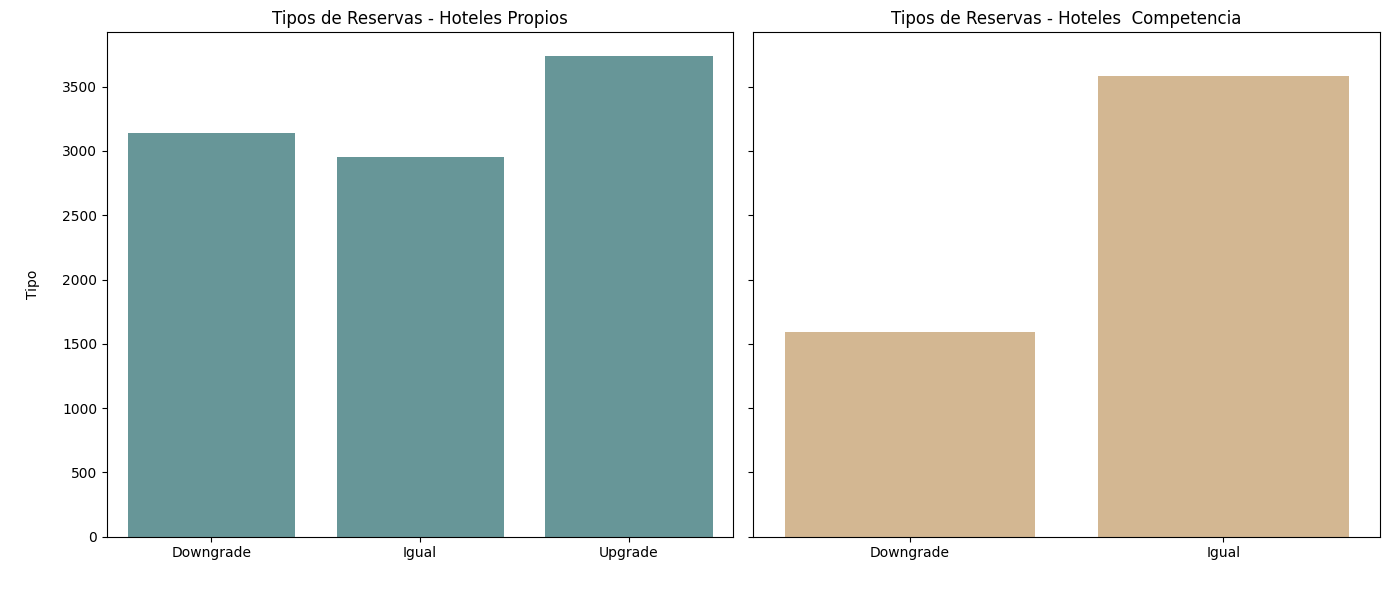

In [62]:

tipo_reserva_propios = tipo_reserva[tipo_reserva["competencia"] == False]
tipo_reserva_competencia = tipo_reserva[tipo_reserva["competencia"] == True]

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True) 

sns.barplot(x=tipo_reserva_propios["Tipo_Reserva"], y=tipo_reserva_propios["id_cliente"], ax=axes[0], color="cadetblue")
axes[0].set_title(f"Tipos de Reservas - Hoteles Propios")
axes[0].set_xlabel(" ")
axes[0].set_ylabel("\nTipo\n")

sns.barplot(x=tipo_reserva_competencia["Tipo_Reserva"],y=tipo_reserva_competencia["id_cliente"], ax=axes[1], color="burlywood")
axes[1].set_title(f"Tipos de Reservas - Hoteles  Competencia")
axes[1].set_xlabel(" ")

plt.tight_layout() 

plt.show()


- Vemos que los hoteles propios parecen ser más atractivos para clientes que buscan un Upgrade:  
    - Si un cliente de la competencia busca un Upgrade, lo hace en hoteles propios.
    - Podría ser una oportunidad para diseñar estrategias de captación, fidelización o diferenciación.

- Los clientes que reservan en la competencia son más sensibles al precio:
    - No buscan mejorar la calidad de los hoteles que reservan sino opciones más económicas

- Hay un gran número de  clientes que está optando por opciones más baratas dentro de los hoteles propios.
    - Puede deberse a problemas en la percepción de valor en hoteles de gama más alta (como ya hemos comprobado anteriormente)


**CONCLUSIÓN**: Los hoteles propios son más atractivos para clientes que buscan un Upgrade --> clave reforzar la estrategia comercial para captar y retener a los clientes de mayor valor.

Next-Steps: Analizar por qué algunos clientes están haciendo downgrade en hoteles propios

In [ ]:
# df_clientes_doble_reserva = df_final[df_final["id_cliente"].isin(clientes_doble_reserva["id_cliente"])]

# clientes_doble_reserva["Desajuste"] = clientes_doble_reserva.apply(lambda row: row["categoria_cliente"] != row["categoria_hotel"], axis=1)




In [ ]:
# conteo_desajustes = df_clientes_ambos.groupby(["competencia", "Desajuste"])["id_cliente"].nunique().reset_index()

# fig = px.bar(conteo_desajustes, 
#              x="Desajuste", 
#              y="id_cliente", 
#              color="competencia",
#              barmode="group",
#              labels={"id_cliente": "Número de Clientes Únicos", "Desajuste":"¿Hay Desajuste?", "competencia":"Tipo Hotel"},
#              color_discrete_map={True: "burlywood", False: "cadetblue"},
#              title="Clientes con Desajuste según Tipo de Hotel"
#             )

# fig.show()


In [ ]:
clientes_doble_reserva_completo = df_final[df_final["id_cliente"].isin(clientes_doble_reserva["id_cliente"])]
df_resumen_tipo_cliente_doble_reserva = clientes_doble_reserva_completo[["id_cliente", "categoria_cliente", "categoria_hotel", "Tipo_Reserva", "competencia"]]



fig = px.histogram(df_resumen_tipo_cliente_doble_reserva, 
                   x="Tipo_Reserva",
                   color="competencia",
                   barmode="group",
                   title="Tipo de Reservas de Clientes con Reservas en Ambos Tipos de Hoteles",
                   labels={"Tipo_Reserva": "Tipo de Reserva", "count": "Cantidad de reservas", "competencia": "Tipo de Hotel"},
                   color_discrete_map={True: "burlywood", False: "cadetblue"}
                  )

fig.show()



In [67]:
# Contar tipos de reserva para hoteles propios y competencia
tipo_por_hotel = df_final[df_final["id_cliente"].isin(clientes_doble_reserva["id_cliente"])].groupby(["competencia", "Tipo_Reserva"])["id_cliente"].count().reset_index()

fig = px.bar(tipo_reserva, 
             x="Tipo_Reserva", 
             y="id_cliente",
             color="competencia",
             barmode='group',
             title="Perfil Cliente vs Perfil Hotel para clientes que reservaron en ambos tipos de hoteles",
             labels={"Tipo_Reserva": "Tipo de Reserva", "id_cliente":"Cantidad Reservas", "competencia": "Tipo de Hotel"},
             color_discrete_map={True: "burlywood", False: "cadetblue"}
            )

fig.show()



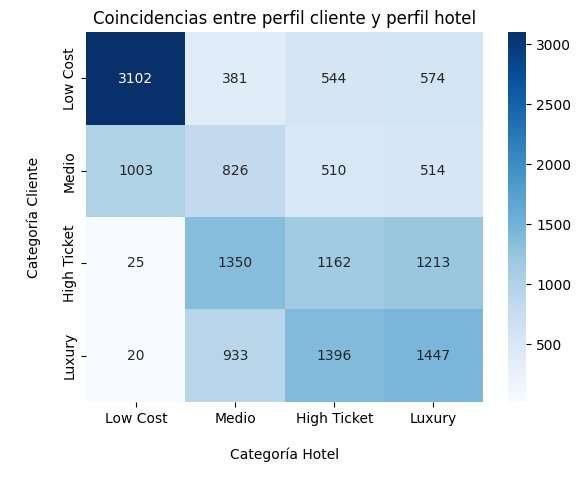

In [66]:
pivot = pd.crosstab(df_final["categoria_cliente"], df_final["categoria_hotel"])
sns.heatmap(pivot, annot=True, fmt="d", cmap="Blues")
plt.title("Coincidencias entre perfil cliente y perfil hotel")
plt.xlabel("\nCategoría Hotel\n")
plt.ylabel("\nCategoría Cliente\n")
plt.show()


In [36]:
df_final.columns

Index(['id_reserva', 'id_cliente', 'nombre', 'apellido', 'mail', 'competencia',
       'fecha_reserva', 'inicio_estancia', 'final_estancia', 'id_hotel',
       'precio_noche', 'nombre_hotel', 'valoracion', 'ciudad', 'id_ciudad',
       'ingreso_reserva', 'categoria_cliente', 'categoria_hotel'],
      dtype='object')

PLOTLY CSS color:  
                aliceblue, antiquewhite, aqua, aquamarine, azure,
                beige, bisque, black, blanchedalmond, blue,
                blueviolet, brown, burlywood, cadetblue,
                chartreuse, chocolate, coral, cornflowerblue,
                cornsilk, crimson, cyan, darkblue, darkcyan,
                darkgoldenrod, darkgray, darkgrey, darkgreen,
                darkkhaki, darkmagenta, darkolivegreen, darkorange,
                darkorchid, darkred, darksalmon, darkseagreen,
                darkslateblue, darkslategray, darkslategrey,
                darkturquoise, darkviolet, deeppink, deepskyblue,
                dimgray, dimgrey, dodgerblue, firebrick,
                floralwhite, forestgreen, fuchsia, gainsboro,
                ghostwhite, gold, goldenrod, gray, grey, green,
                greenyellow, honeydew, hotpink, indianred, indigo,
                forestgreen, khaki, lavender, lavenderblush, lawngreen,
                lemonchiffon, lightblue, lightcoral, lightcyan,
                lightgoldenrodyellow, lightgray, lightgrey,
                lightgreen, lightpink, lightsalmon, lightseagreen,
                lightskyblue, lightslategray, lightslategrey,
                lightsteelblue, lightyellow, lime, limegreen,
                linen, magenta, maroon, mediumaquamarine,
                mediumblue, mediumorchid, mediumpurple,
                mediumseagreen, mediumslateblue, mediumspringgreen,
                mediumturquoise, mediumvioletred, midnightblue,
                mintcream, mistyrose, moccasin, navajowhite, navy,
                oldlace, olive, olivedrab, orange, orangered,
                orchid, palegoldenrod, palegreen, paleturquoise,
                palevioletred, papayawhip, peachpuff, peru, pink,
                plum, powderblue, purple, red, rosybrown,
                royalblue, saddlebrown, salmon, sandybrown,
                seagreen, seashell, sienna, silver, skyblue,
                slateblue, slategray, slategrey, snow, springgreen,
                steelblue, tan, teal, thistle, tomato, turquoise,
                violet, wheat, white, whitesmoke, yellow,
                yellowgreen

In [38]:
[
    '#1f77b4',  # muted blue
    '#ff7f0e',  # safety orange
    '#2ca02c',  # cooked asparagus green
    '#d62728',  # brick red
    '#9467bd',  # muted purple
    '#8c564b',  # chestnut brown
    '#e377c2',  # raspberry yogurt pink
    '#7f7f7f',  # middle gray
    '#bcbd22',  # curry yellow-green
    '#17becf'   # blue-teal
]

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']